In [4]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

## Stages:

1. Data cleaning
2. EDA
3. Text preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website
8. Deployment

#### Data cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [15]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
##RENAMING columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [18]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
df['target']=encoder.fit_transform(df['target'])

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
df.duplicated().sum()

403

In [25]:
## remove duplicated
df=df.drop_duplicates(keep='first')

In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(5169, 2)

#### EDA

In [28]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

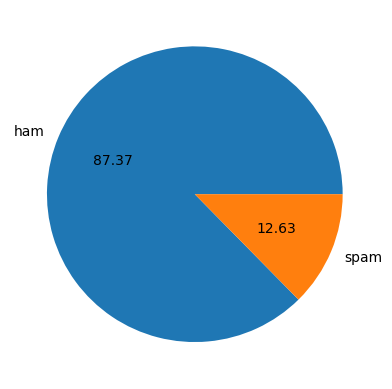

In [30]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [31]:
#### DATA is imbalanced

#### We are going to make three new columns -> no. of char, no.of words, no.of sentences in each sms

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Vikas
[nltk_data]     Velmurugan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
df['num_char']=df['text'].apply(len)

In [38]:
## no. of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [40]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [44]:
## analysis for ham
df[df['target']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [45]:
df[df['target']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [46]:
### Comparing the means of ham and spam, we can see that spam messages have more 
### characters,words and sentences. 

In [47]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

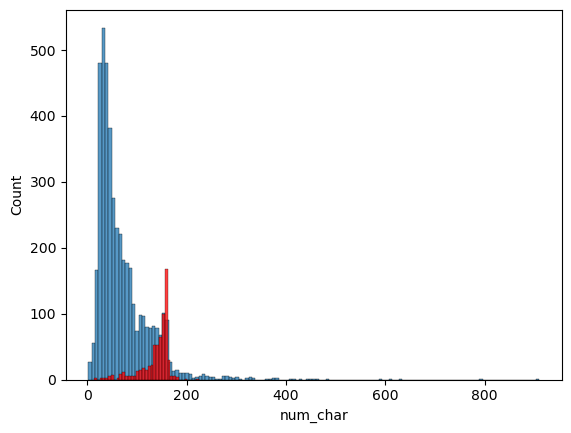

In [51]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

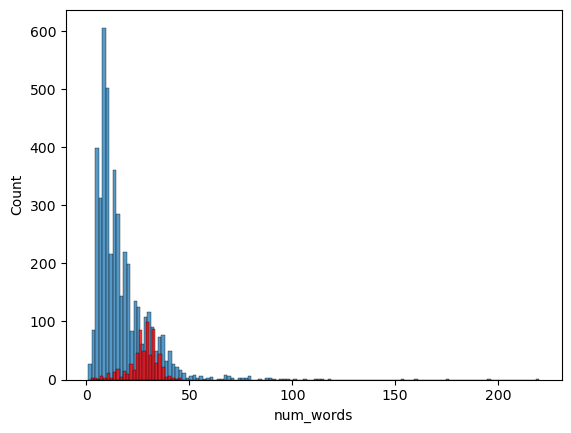

In [52]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

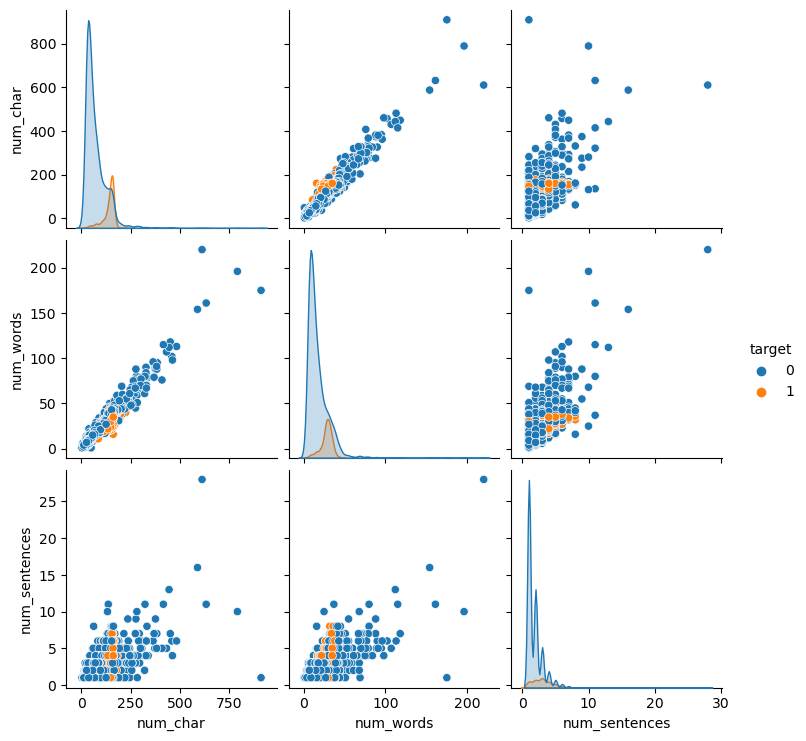

In [53]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

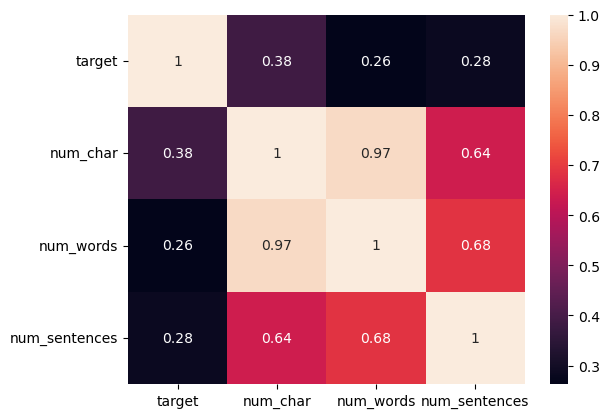

In [54]:
sns.heatmap(df.corr(),annot=True)

* num char and num_sentences are correlated 0.64
* num words and num_sentences are highly correlated 0.68
* num_words and num_char are highy correlated -.97

#### there is multi-collinearity in the dataset so we can choose num of char preferrably as it is more correlated towards the output

##### Data Preprocessing

1. lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuations
5. Stemming

In [80]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopword and i not in s:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [65]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Vikas
[nltk_data]     Velmurugan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [69]:
from nltk.corpus import stopwords
stopword=stopwords.words('english')

In [70]:
import string
s=string.punctuation

In [79]:
transform_text('I loved the debut match of Lionel Messi with Inter Miami. How about you?')

['love', 'debut', 'match', 'lionel', 'messi', 'inter', 'miami']

### AS U CAN SEE IT IS REMOVING THE STOP WORDS

In [74]:
from nltk.stem.porter import PorterStemmer

In [75]:
ps=PorterStemmer()

In [76]:
ps.stem('dancing')

'danc'

In [77]:
ps.stem('loving')

'love'

#### Making a new column for transformed text

In [81]:
df['transformed_text']=df['text'].apply(transform_text)

In [82]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [84]:
! pip install WordCloud

     -------------------------------------- 153.3/153.3 kB 3.0 MB/s eta 0:00:00


In [90]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [91]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

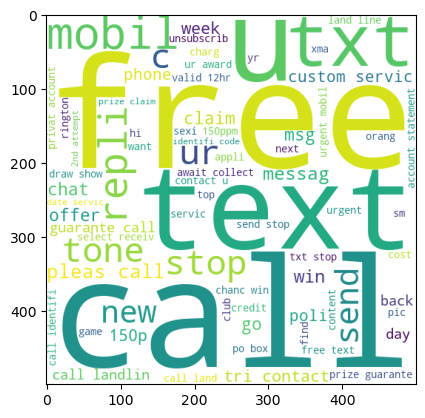

In [92]:
plt.imshow(spam_wc)

In [93]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

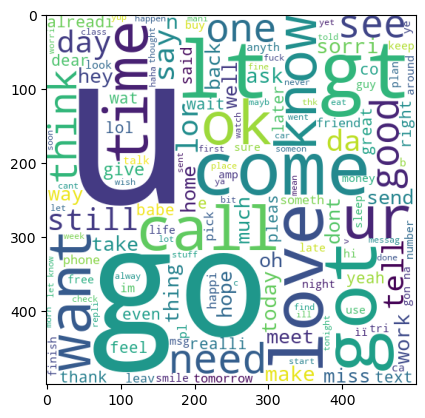

In [94]:
plt.imshow(ham_wc)

In [95]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [96]:
len(spam_corpus)

9939

#### Finding out the 30 most occuring words

In [97]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [111]:
import warnings
warnings.simplefilter("ignore")

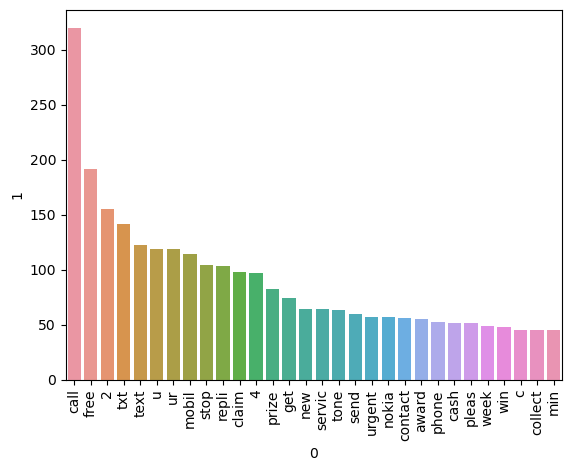

In [112]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [113]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [114]:
len(ham_corpus)

35394

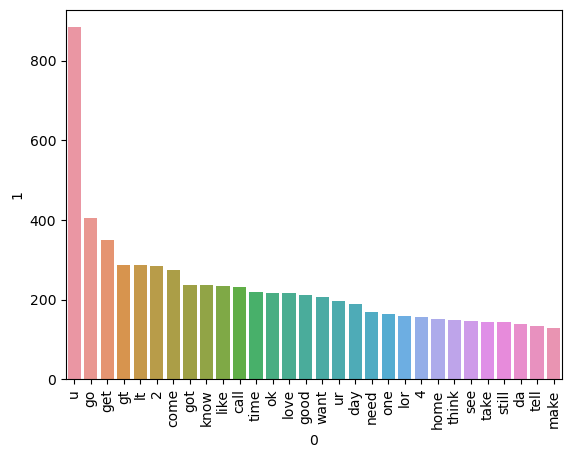

In [115]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building

##### Our target column is numerical but our input is in the form of words.
##### So we need to vectorize our input

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [117]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [118]:
X.shape

(5169, 6708)

In [119]:
y=df['target'].values

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [122]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [123]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [126]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [125]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [127]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [128]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

In [129]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [130]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

In [131]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [144]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [146]:
gnb.fit(X_train,y_train)
y_pred4=gnb.predict(X_test)

In [147]:
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [148]:
mnb.fit(X_train,y_train)
y_pred5=mnb.predict(X_test)

In [149]:
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [150]:
bnb.fit(X_train,y_train)
y_pred6=mnb.predict(X_test)

In [151]:
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


#### We choose tfidf ----> mnb

In [152]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))